<a href="https://colab.research.google.com/github/start-dash/Intro-to-ML/blob/main/HW3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Preprocessing and Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
# Try Naive Gaussian Bays
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# Setting Up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/start-dash/Intro-to-ML/main/Datasets/cancer.csv"
cancer = pd.read_csv(url)
breast_set = load_breast_cancer()

cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Preprocessing

In [2]:
dataset = cancer.drop('id', axis=1)
diagnosis = dataset.pop('diagnosis')
dataset.insert(30, 'label', diagnosis)

dataset.columns = np.append(breast_set.feature_names, 'diagnosis')
dataset['diagnosis'].replace('B', 0, inplace = True)
dataset['diagnosis'].replace('M', 1, inplace=True)

x = dataset.iloc[:,:30].values
y = dataset.iloc[:, 30].values


In [3]:
# Proper scaling is done via feature scaling, or scaling the data b/w 0 and 1 to get better accuracy.
# Scaling is important since theere is a huge difference between all the X inputs. This also standardizes.
# Scaler object is made
sc_X = StandardScaler()
# The scaler is fit to the training data and transform
X_train = sc_X.fit_transform(x)
# Apply the scaler to the test data
X_test = sc_X.transform(X_train)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

Naive Bayesian Classifier

In [5]:
# fit a Naive Bayes model to the data
classifier = GaussianNB()
classifier.fit(x_train, y_train) # dataset.data, dataset.target

y_pred = classifier.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

Model Evaluation

In [6]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

[[63  4]
 [ 4 43]]


Plotting

Text(0.5, 427.9555555555555, 'Predicted Result')

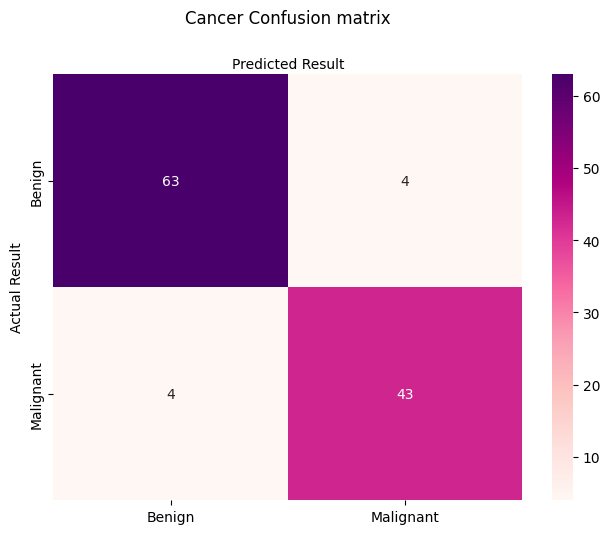

In [7]:
fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"]
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu", fmt='g')

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix', y=1.1)
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')